In [65]:
##Clear the environment
rm(list=ls())

##Turn off scientific notations for numbers
options(scipen = 999)  

##Set locale
Sys.setlocale("LC_ALL", "English") 

##Set seed for reproducibility
set.seed(2345)

# Turn off warnings
options(warn = -1)

getstats <- function(cm){
  # Sensititvity a.k.a TPR
  tpr <-cm[2,2]/(cm[2,2]+cm[2,1])
  fpr <-cm[1,2]/(cm[1,2]+cm[1,1])
  
  # Specificity a.k.a. TNR
  tnr <- cm[1,1]/(cm[1,1]+cm[1,2])
  fnr <- cm[2,1]/(cm[2,1]+cm[2,2])
  
  # Calculate accuracy
  acc <-(cm[2,2]+cm[1,1])/sum(cm)
  err <-(cm[1,2]+cm[2,1])/sum(cm)
  
  #Precision - Positive Predictive Value
  ppv <- cm[2,2]/(cm[2,2]+cm[1,2])
  
  # Negative Predictive Value
  npv <- cm[1,1]/(cm[1,1]+cm[2,1])
  
  rbind(TruePos_Sensitivity=tpr, FalsePos=fpr, TrueNeg_Specificty=tnr, FalseNeg=fnr, PositivePredictiveValue=ppv, NegativePredictiveValue=npv, Accuracy = acc, Error = err)
}

# clean the data names and data
# Use: df<-cleanit(df)
cleanit <-function(df){
  names(df) <-tolower(names(df))
  names(df) <- gsub("\\(","",names(df))
  names(df) <- gsub("\\)","",names(df))
  names(df) <- gsub("\\.","",names(df))
  names(df) <- gsub("_","",names(df))
  names(df) <- gsub("-","",names(df))
  names(df) <- gsub(",","",names(df))
  return(df)
}


[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

In [66]:
fname <- file.choose()

In [67]:
df <- read.csv(fname, header=TRUE, sep=",",stringsAsFactors=FALSE)

In [68]:
df<-cleanit(df)
str(df)

'data.frame':	2698 obs. of  21 variables:
 $ year                                 : int  1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 ...
 $ population                           : int  3266740 3302000 3358000 3347000 3407000 3462000 3517000 3540000 3566000 3531000 ...
 $ violentcrimetotal                    : int  6097 5564 5283 6115 7260 6916 8098 8448 8288 8842 ...
 $ murderandnonnegligentmanslaughter    : int  406 427 316 340 316 395 384 415 421 485 ...
 $ forciblerape                         : int  281 252 218 192 397 367 341 371 396 494 ...
 $ robbery                              : int  898 630 754 828 992 992 1124 1167 1462 1448 ...
 $ aggravatedassault                    : int  4512 4255 3995 4755 5555 5162 6249 6495 6009 6415 ...
 $ propertycrimetotal                   : int  33823 32541 35829 38521 46290 48215 53740 57079 62997 66248 ...
 $ burglary                             : int  11626 11205 11722 12614 15898 16398 18551 20227 22403 23559 ...
 $ larcenytheft          

In [69]:
##Convert Multiple columns in this example to numeric
ix <- 1:20
df[ix] <- lapply(df[ix], as.numeric) 
str(df)

'data.frame':	2698 obs. of  21 variables:
 $ year                                 : num  1960 1961 1962 1963 1964 ...
 $ population                           : num  3266740 3302000 3358000 3347000 3407000 ...
 $ violentcrimetotal                    : num  6097 5564 5283 6115 7260 ...
 $ murderandnonnegligentmanslaughter    : num  406 427 316 340 316 395 384 415 421 485 ...
 $ forciblerape                         : num  281 252 218 192 397 367 341 371 396 494 ...
 $ robbery                              : num  898 630 754 828 992 ...
 $ aggravatedassault                    : num  4512 4255 3995 4755 5555 ...
 $ propertycrimetotal                   : num  33823 32541 35829 38521 46290 ...
 $ burglary                             : num  11626 11205 11722 12614 15898 ...
 $ larcenytheft                         : num  19344 18801 21306 22874 26713 ...
 $ motorvehicletheft                    : num  2853 2535 2801 3033 3679 ...
 $ violentcrimerate                     : num  187 168 157 183 213 

In [70]:
summary(df)

      year        population       violentcrimetotal
 Min.   :1960   Min.   :  226167   Min.   :    37   
 1st Qu.:1973   1st Qu.: 1180250   1st Qu.:  3012   
 Median :1986   Median : 3211500   Median : 10574   
 Mean   :1986   Mean   : 4751877   Mean   : 23260   
 3rd Qu.:1999   3rd Qu.: 5689128   3rd Qu.: 27197   
 Max.   :2012   Max.   :38041430   Max.   :345624   
 murderandnonnegligentmanslaughter  forciblerape        robbery        
 Min.   :   1.0                    Min.   :    6.0   Min.   :     8.0  
 1st Qu.:  46.0                    1st Qu.:  286.2   1st Qu.:   779.5  
 Median : 180.0                    Median :  800.0   Median :  3091.0  
 Mean   : 341.4                    Mean   : 1418.4   Mean   :  8199.9  
 3rd Qu.: 436.0                    3rd Qu.: 1701.5   3rd Qu.:  7801.5  
 Max.   :4096.0                    Max.   :13693.0   Max.   :130897.0  
 aggravatedassault propertycrimetotal    burglary       larcenytheft   
 Min.   :    14    Min.   :   3147    Min.   :   751 

In [71]:
# count blanks remove blanks
#barplot(colSums(!is.na(df)))
colSums(!is.na(df)) ## Count blanks
#df <- na.omit(df) ## THis will remove blanks

year                            population 
                                 2698                                  2698 
                    violentcrimetotal     murderandnonnegligentmanslaughter 
                                 2698                                  2698 
                         forciblerape                               robbery 
                                 2698                                  2698 
                    aggravatedassault                    propertycrimetotal 
                                 2698                                  2698 
                             burglary                          larcenytheft 
                                 2698                                  2698 
                    motorvehicletheft                      violentcrimerate 
                                 2698                                  2698 
murderandnonnegligentmanslaughterrate                      forcibleraperate 
                                 2698                                  2698 
                          robberyrate                 aggravatedassaultrate 
                                 2698                                  2698 
                    propertycrimerate                          burglaryrate 
                                 2698                                  2698 
                     larcenytheftrate                 motorvehicletheftrate 
                                 2698                                  2698 
                                state 
                                 2698

In [72]:
aggdata <-aggregate(df, by=list(df$year,df$state), FUN=mean, na.rm=TRUE)

In [73]:
head(aggdata)

,Group.1,Group.2,year,population,violentcrimetotal,murderandnonnegligentmanslaughter,forciblerape,robbery,aggravatedassault,propertycrimetotal,ellip.h,violentcrimerate,murderandnonnegligentmanslaughterrate,forcibleraperate,robberyrate,aggravatedassaultrate,propertycrimerate,burglaryrate,larcenytheftrate,motorvehicletheftrate,state
1,1960,AK,1960,226167,236,23,47,64,102,3494,<8b>,104.3,10.2,20.8,28.3,45.1,1544.9,332.1,970.5,242.3,NA
2,1961,AK,1961,234000,208,27,31,29,121,3605,<8b>,88.9,11.5,13.2,12.4,51.7,1540.6,380.8,950,209.8,NA
3,1962,AK,1962,246000,225,11,46,34,134,3849,<8b>,91.5,4.5,18.7,13.8,54.5,1564.6,351.6,985.4,227.6,NA
4,1963,AK,1963,248000,272,16,37,55,164,4843,<8b>,109.7,6.5,14.9,22.2,66.1,1952.8,381.5,1213.7,357.7,NA
5,1964,AK,1964,250000,375,26,56,53,240,5040,<8b>,150,10.4,22.4,21.2,96,2016,443.6,1218.4,354,NA
6,1965,AK,1965,253000,377,16,45,101,215,6210,<8b>,149,6.3,17.8,39.9,85,2454.5,554.5,1492.9,407.1,NA


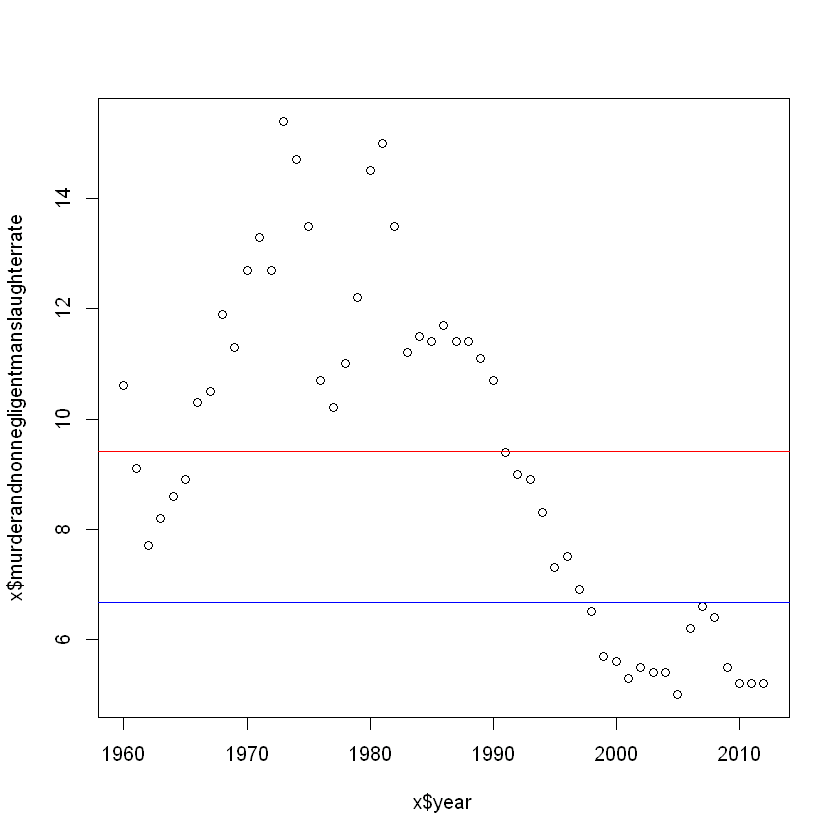

In [74]:
x <- subset(df, df$state =="FL")
plot (x$year,x$murderandnonnegligentmanslaughterrate)
abline(h=mean(x$murderandnonnegligentmanslaughterrate, na.rm=TRUE),col="red")
abline(h=mean(df$murderandnonnegligentmanslaughterrate, na.rm=TRUE),col="blue")

In [75]:
?mean

mean {base},R Documentation
x,"An R object. Currently there are methods for numeric/logical vectors and date, date-time and time interval objects. Complex vectors are allowed for trim = 0, only."
trim,the fraction (0 to 0.5) of observations to be trimmed from each end of x before the mean is computed. Values of trim outside that range are taken as the nearest endpoint.
na.rm,a logical value indicating whether NA values should be stripped before the computation proceeds.
...,further arguments passed to or from other methods.
